In [1]:
import numpy as np
from filterpy.kalman import EnsembleKalmanFilter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import time
from enkf import *

## Harmonic oscillator


In [2]:
w=2
x = np.array([2,0])
Pe = 2*np.pi/w
dt= Pe/20
T = 3*Pe
N = int(round(T/dt))
def fx_rk4(x,t, dt,w):
        def f(t,X_n,w):
            (u,v)=X_n
            f_1 = v
            f_2 =-w**2*u
            return np.array([f_1,f_2])
        K1=f(t, x,w)
        K2=f(t+dt/2., x + 1./2. * K1 * dt,w)
        K3=f(t+dt/2., x + 1./2. * K2 * dt,w)
        K4=f(t, x+ K3 * dt,w)
        X_next=x+ dt/6.* (K1+2.*K2+2.*K3+K4)
        return X_next
def fx_euler(x,t, dt,w):
        def f(t,X_n,w): 
            (u,v)=X_n
            f_1 = v
            f_2 =-w**2*u
            return np.array([f_1,f_2])
        V=f(dt,x,w)
        X_next=[x[0]+V[0]*dt,x[1]+V[1]*dt]
        return X_next
oscillateur=RK4_harmonique(w,x,N,T)
oscillateur2=euler_explicit_harmonique(w,x,N,T)

In [3]:
def hx(x):
       return  np.array([x[0]])
P = np.eye(2) * 0.01
R = np.eye(1)*0.001 # matrice de cov associer a la mesure
Q=np.eye(2)*0.01

def read_sensor(t):
        2*np.cos(2*t)

In [4]:
tab_model,tab_temps_model,tab_cov_model=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_rk4,w)
tab_etat,tab_temps_2,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_euler,w)


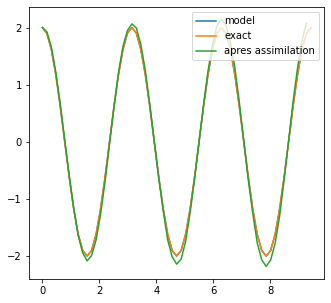

In [5]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur[2],oscillateur[0],label='model')
ax1.plot(oscillateur[2], 2*np.cos(w*oscillateur[2]),label='exact')
ax1.plot(tab_temps_model,tab_model[:,0],label='apres assimilation')
ax1.legend(loc='upper right')



In [6]:
P = np.eye(2) * 0.0
R = np.eye(1)*0.001 # matrice de cov associer a la mesure
Q=np.eye(2)*0.0

tab_model,tab_temps_model,tab_cov_model=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_rk4,w)




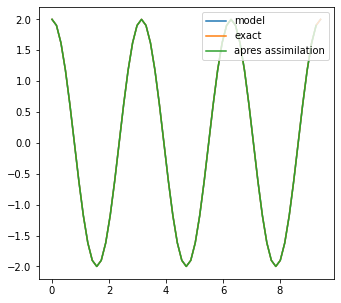

In [7]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur[2],oscillateur[0],label='model')
ax1.plot(oscillateur[2], 2*np.cos(w*oscillateur[2]),label='exact')
ax1.plot(tab_temps_model,tab_model[:,0],label='apres assimilation')
ax1.legend(loc='upper right')

In [8]:
P = np.eye(2) * 0.1
R = np.eye(1)*0.001 
Q=np.eye(2)*0.1
tab_etat,tab_temps_2,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,1,dt,1,40,hx,fx_euler,w)

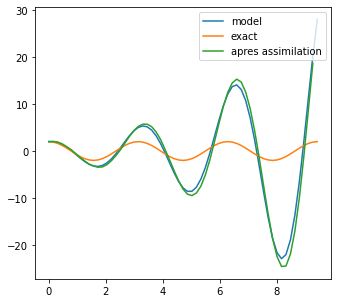

In [9]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(oscillateur2[2],oscillateur2[0],label='model')
ax1.plot(oscillateur2[2], 2*np.cos(w*oscillateur2[2]),label='exact')
ax1.plot(tab_temps_2,tab_etat[:,0],label='apres assimilation')
ax1.legend(loc='upper right')

## Data assimilation with the Lorenz System

In [10]:
γ=(12.,6.,12.) #(σ,b,r)
X0=(-10.,-10.,25.) #(x0,y0,z0)
T=1
N=int(T/0.01)


In [11]:
lorenz1=RK4_Lorenz(γ,X0,N,T)

In [12]:

N=int(T/0.1)


In [13]:
lorenz2=RK4_Lorenz(γ,X0,N,T)

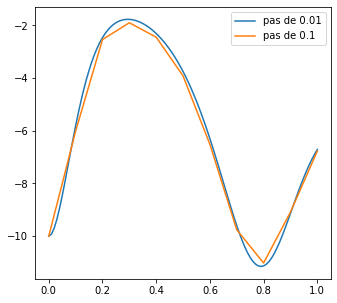

In [14]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz1[3],lorenz1[0],label="pas de 0.01")
ax1.plot(lorenz2[3],lorenz2[0],label="pas de 0.1")
ax1.legend()

In [15]:

γ=(12.,6.,12.)  #(σ,b,r)
N=10
T=1

x = np.array([-10.,-10.,25.])#(x0,y0,z0)
dt= N*0.01
P = np.eye(3) * 2.

### Assimilation only with the model

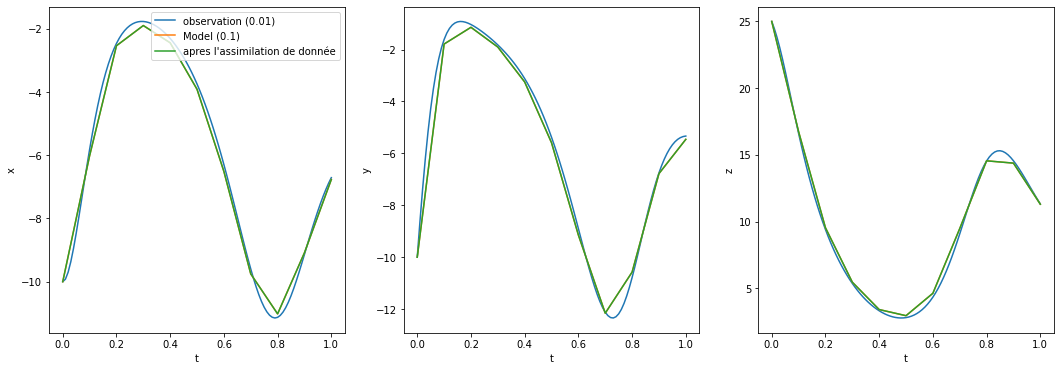

In [16]:
def hx_model(x):
   return x

R= np.eye(3)*0.001  
Q=np.zeros((3,3))
dt= N*0.01
P = np.eye(3)*0

def read_sensor_model(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

tab_model,tab_temps_model,tab_cov_model=assimilation_donnée(x,read_sensor_model,P,Q,R,T,3,dt,N,40,hx_model,fx,γ)
plot(lorenz1,lorenz2,tab_temps_model,tab_model)

### Observation of the 3 components x,y,z

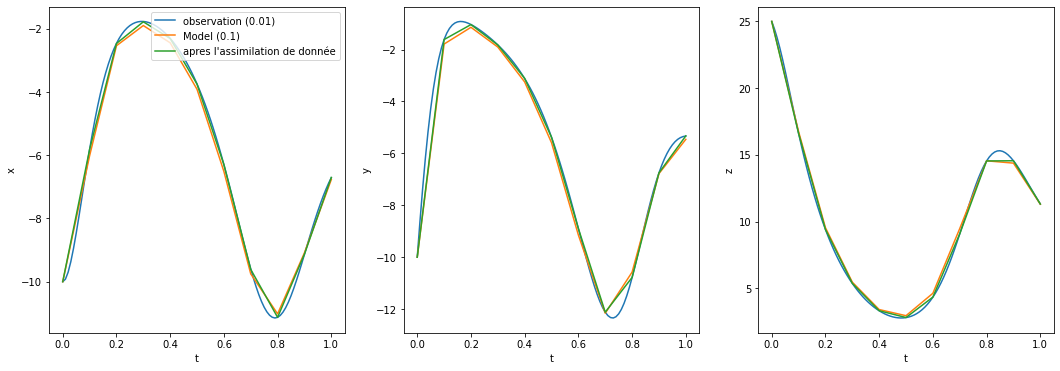

In [17]:
def hx(x):
   return x


P=np.eye(3)*0.1
Q=np.eye(3)*0.1
R= np.eye(3)*0.001  

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])

tab,tab_temps,tab_cov=assimilation_donnée(x,read_sensor,P,Q,R,T,3,dt,N,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)

### Observation only of the component x

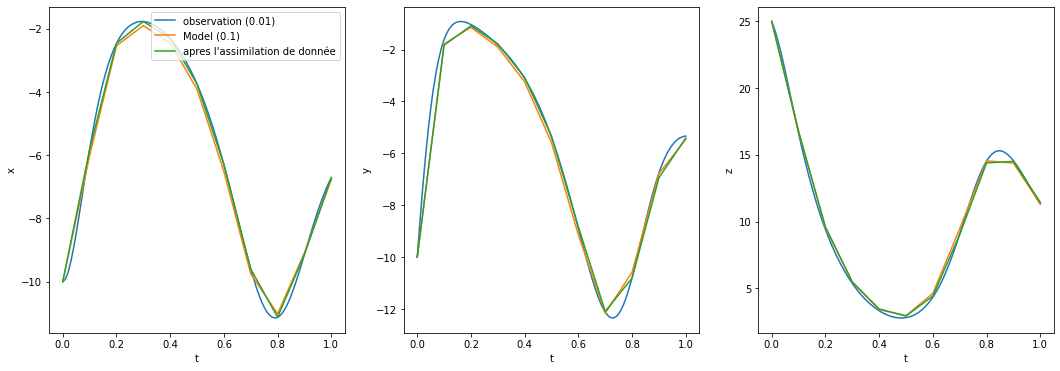

In [18]:
def hx_x(x):
   return np.array([x[0]])



R_x = np.eye(1)*0.001 

def read_sensor_x(index):
    return np.array([lorenz1[0][index]])



tab_x,tab_temps,tab_cov_x=assimilation_donnée(x,read_sensor_x,P,Q,R_x,T,1,dt,N,40,hx_x,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x)

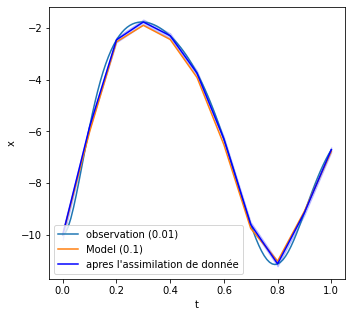

In [19]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x,0.1,tab_x,"t","x")

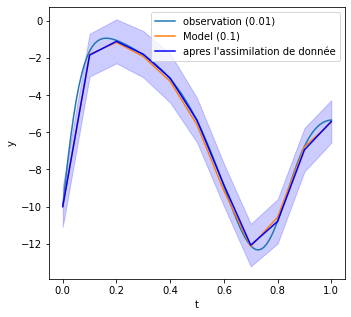

In [20]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x,1,tab_x,"t","y")

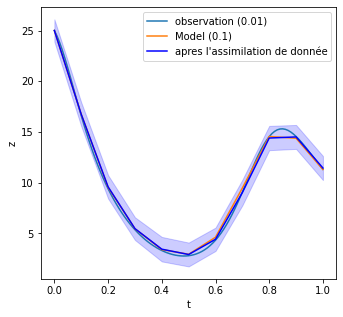

In [21]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x,1,tab_x,"t","z")

### Observation only of the components x,y

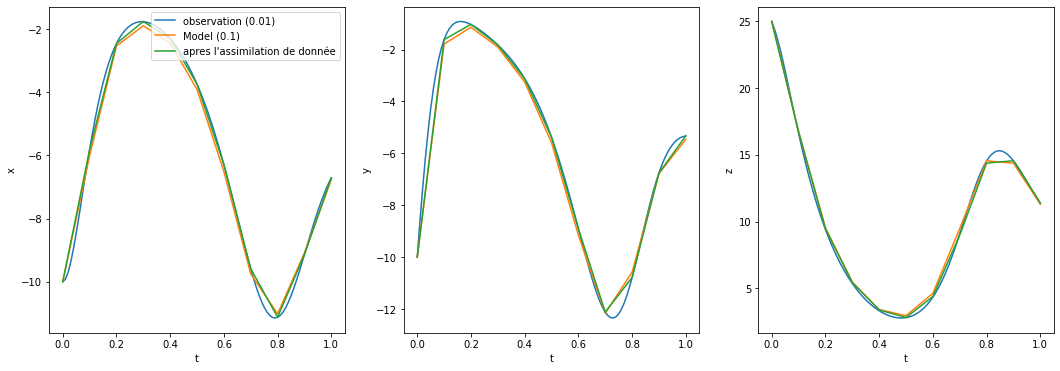

In [22]:
def hx_x_y(x):
   return np.array([x[0],x[1]])



R_x_y = np.eye(2)*0.001  

def read_sensor_x_y(index):
    return np.array([lorenz1[0][index],lorenz1[1][index]])



tab_x_y,tab_temps,tab_cov_x_y=assimilation_donnée(x,read_sensor_x_y,P,Q,R_x_y,T,2,dt,N,40,hx_x_y,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_x_y)



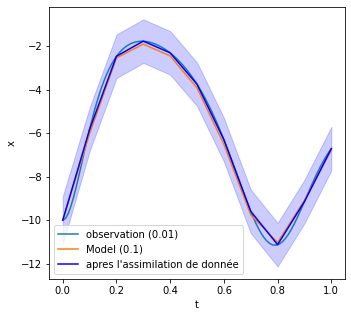

In [23]:
plot_1_fig(lorenz1,lorenz2,0,tab_temps,tab_cov_x_y,1,tab_x_y,"t","x")

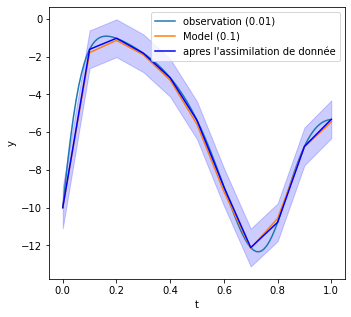

In [24]:
plot_1_fig(lorenz1,lorenz2,1,tab_temps,tab_cov_x_y,1,tab_x_y,"t","y")

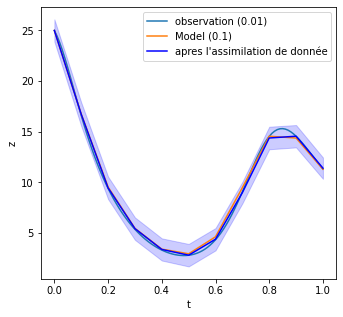

In [25]:
plot_1_fig(lorenz1,lorenz2,2,tab_temps,tab_cov_x_y,1,tab_x_y,"t","z")

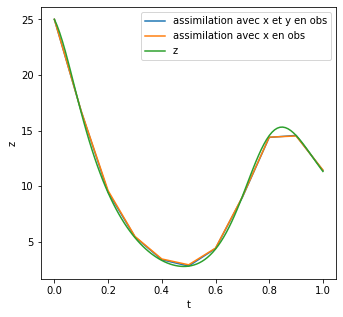

In [26]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(tab_temps,tab_x_y[:,2],label="assimilation avec x et y en obs")
ax1.plot(tab_temps,tab_x[:,2],label="assimilation avec x en obs")
ax1.plot(lorenz1[3],lorenz1[2],label="z")
plt.xlabel("t")
plt.ylabel("z")

ax1.legend()

### Observation only of the component z

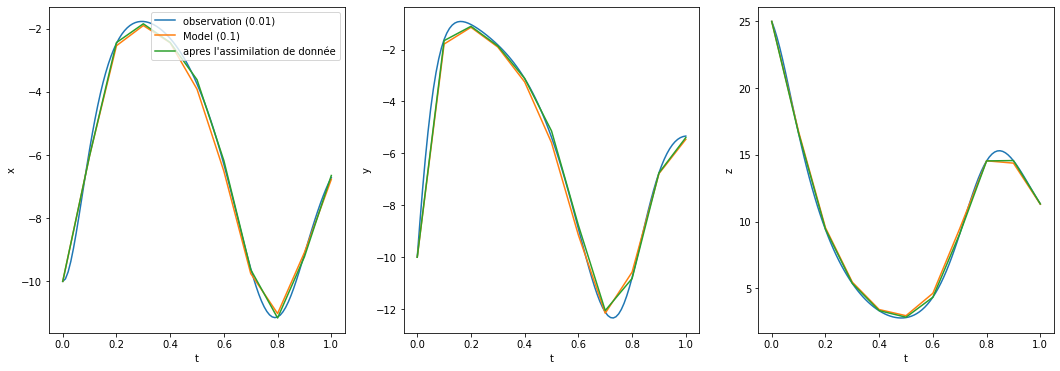

In [27]:
def hx_z(x):
   return np.array([x[2]])



R_z = np.eye(1)*0.01 

def read_sensor_z(index):
    return np.array([lorenz1[2][index]])



tab_z,tab_temps,tab_cov_z=assimilation_donnée(x,read_sensor_z,P,Q,R_z,T,1,dt,N,40,hx_z,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab_z)



## Data assimilation with different parameters for the Lorenz System

In [28]:
γ=(12.,6.,12.) #(σ,b,r)
X0_obs=np.array([-10.,10.,25.]) 

T=4
dt=0.01
N=int(T/dt)


In [29]:
lorenz1=RK4_Lorenz(γ,X0_obs,N,T)

In [30]:
γ2=(10.,6.,10.) #(σ,b,r)
X0=np.array([-10.,10.,25.]) 

T=4
dt=0.1
N=int(T/dt)

In [31]:
lorenz2=RK4_Lorenz(γ2,X0,N,T)

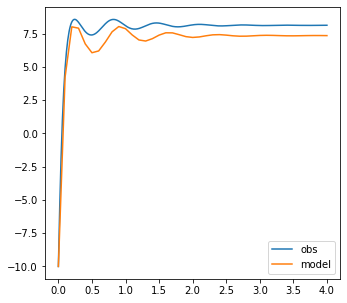

In [32]:
fig=plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,2)
ax1.plot(lorenz1[3],lorenz1[0],label="obs")
ax1.plot(lorenz2[3],lorenz2[0],label="model")
ax1.legend()

### Observation of the 3 components x,y,z

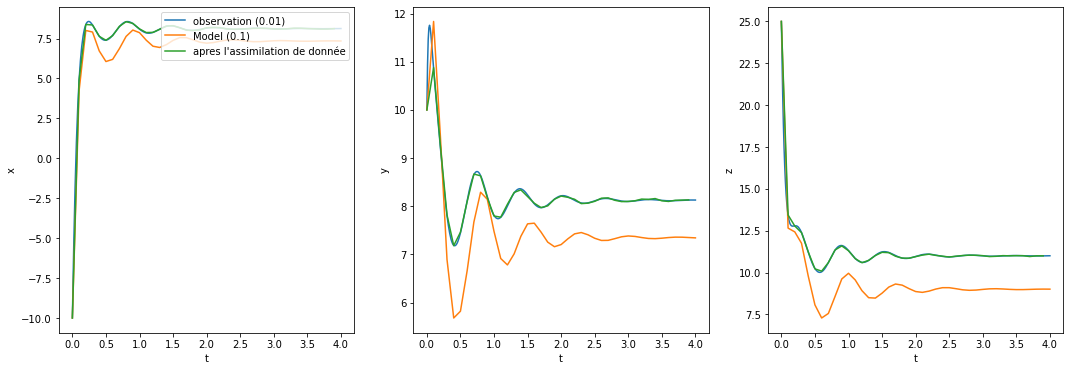

In [33]:
def hx(x):
   return x

R= np.eye(3)*0.01  
Q=np.eye(3)*0.1
P = np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])
N_=10
tab,tab_temps,tab_cov_model=assimilation_donnée(X0,read_sensor,P,Q,R,T,3,dt,N_,40,hx,fx,γ)
plot(lorenz1,lorenz2,tab_temps,tab)


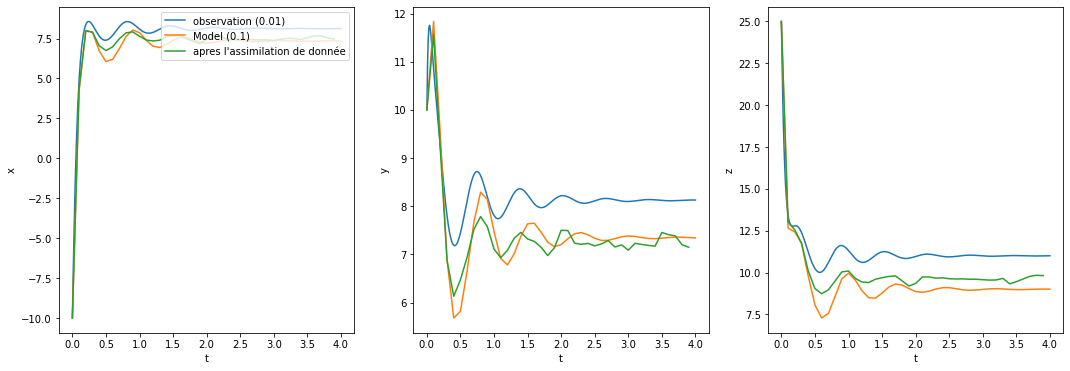

In [34]:
def hx(x):
   return x

R= np.eye(3)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[0][index],lorenz1[1][index],lorenz1[2][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,3,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)


### Observation only of the component x

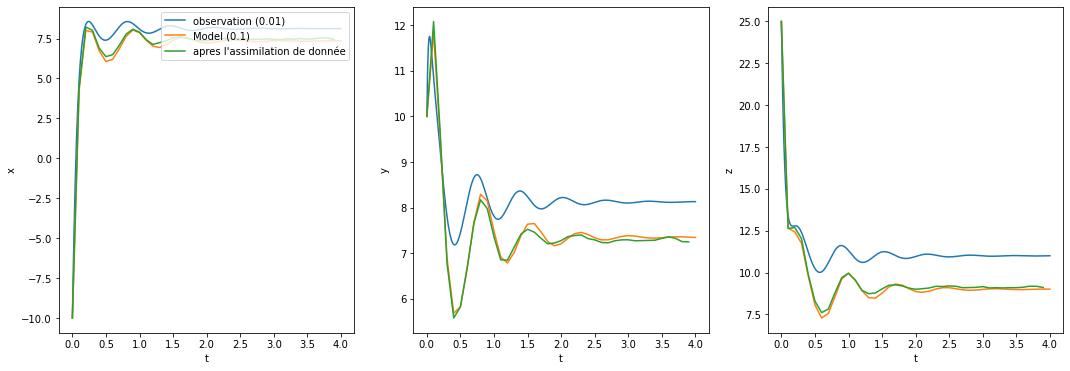

In [35]:
def hx(x):
   return [x[0]]

R= np.eye(1)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[0][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,1,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)


### Observation only of the component x y

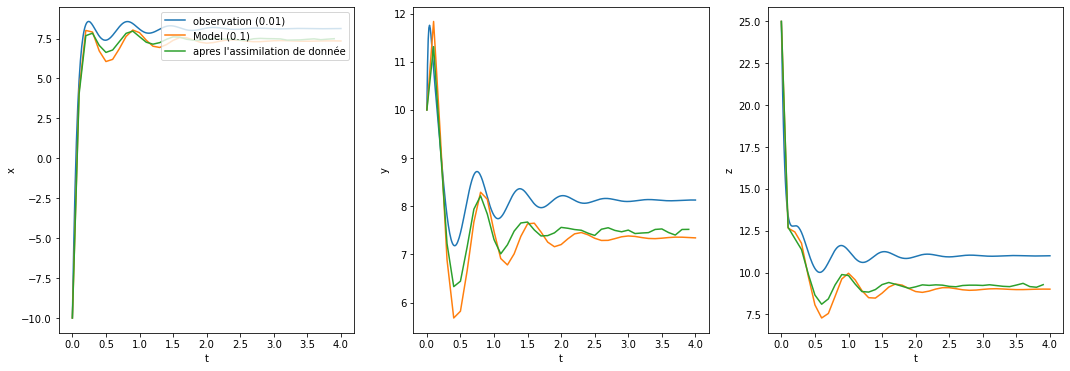

In [36]:
def hx(x):
   return [x[1]]

R= np.eye(1)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[1][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,1,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)


### Observation only of the component x z

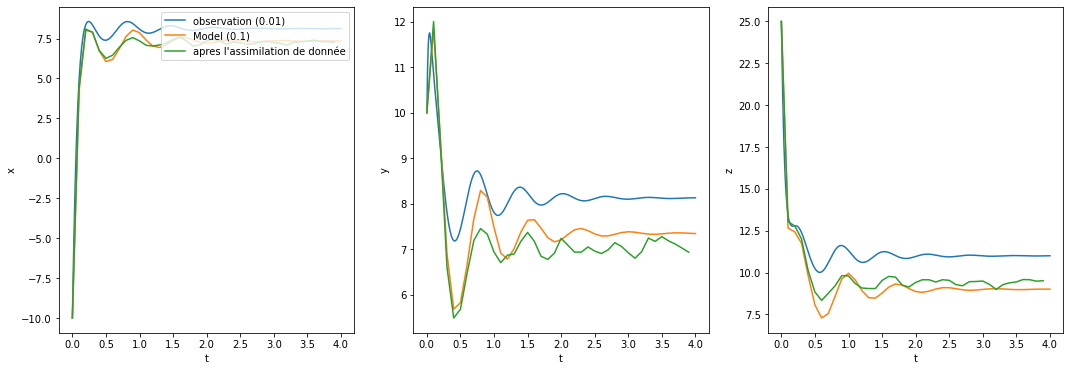

In [37]:
def hx(x):
   return [x[2]]

R= np.eye(1)*0.1  
Q=np.eye(3)*0.01
P=np.eye(3)*0.1

def read_sensor(index):
    return np.array([lorenz1[2][index]])
N_=10
tab,tab_temps,tab_cov=assimilation_donnée(X0,read_sensor,P,Q,R,T,1,dt,N_,40,hx,fx,γ2)
plot(lorenz1,lorenz2,tab_temps,tab)
